In [1]:
%matplotlib inline


# árvore de decisão simples e com AdaBoost

A decision tree is boosted using the AdaBoost.R2 [1]_ algorithm on a 1D
sinusoidal dataset with a small amount of Gaussian noise.
299 boosts (300 decision trees) is compared with a single decision tree
regressor. As the number of boosts is increased the regressor can fit more
detail.

.. [1] H. Drucker, "Improving Regressors using Boosting Techniques", 1997.


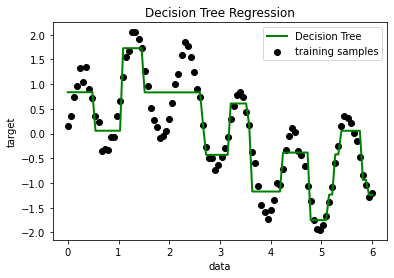

In [11]:
# Author: Noel Dawe
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Cria uma função
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_1.fit(X, y)


# Predict
y_1 = regr_1.predict(X)


# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="Decision Tree", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

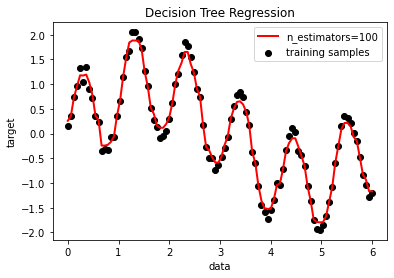

In [15]:
n=100
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=n, random_state=rng)
regr_2.fit(X, y)

y_2 = regr_2.predict(X)
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_2, c="r", label="n_estimators=%d"%n, linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()